# Logistic Regression

### Contents
 
1. [**Introduction**](#Introduction)  
     1.1. The sigmoid function  
     1.2. Comparison with Adaline  
2. [**Estimation of the parameters**](#Estimation-of-the-parameters)  
    2.1. Logistic cost function  
    2.2. Gradient ascent/descent  
3. [**Multiple Logistic Regression**](#Multiple-Logistic-Regression)  

# Introduction

Consider a binary classification problem (meaning that the output variable $Y$ corresponding to an input vector $X$ can take only two possible values, for instance $0$ or $1$, which represents two possible classes/categories). Rather than modeling the response variable $Y$ directly, logistic regression models the **probability** that $Y$ belongs to a particular category. Therefore, let's indicate with $p(X)=\text{Pr}(Y=1|X)$ the probability for the observation $X$ to belong to category $1$. Therefore, we can write:

$$\begin{cases} 
\text{Pr}(Y=1|X) = p(X) \\
\text{Pr}(Y=0|X) = 1 - p(X)
\end{cases}$$

which is summarizable into a single expression:

$$\text{Pr}(Y|X) = p(X)^Y (1-p(X))^{1-Y}. $$

**Definition (Odds):** the odds in favor of an event are defined as 

$$ODDS = \frac{p(X)}{1-p(X)}$$ 

and that quantity can take on any value between $0$ and $\infty$. The odds of some event _reflect the likelihood that the event will take place_.

If we choose to use a *linear regression model* of the form $p(X;\beta_0, \mathbf{\beta})=\beta_0 + \mathbf{\beta}^T X$ to represent the probabilities (for the ease of notation, we'll omit the terms $\beta_0$ and $\mathbf{\beta}$ in $p(X;\beta_0,\mathbf{\beta})$), then it may happen that, for some value of $X$, we may predict $p(X)<0$ or $p(X)>1$. To avoid this problem, we must model $p(X)$ with a function that produces outputs between 0 and 1, such as the **logistic sigmoid function**:

$$\begin{split}
\text{Pr}(Y=1|X)=p(X)&=\frac{e^{\beta_0+\beta^T X}}{1+e^{\beta_0+\beta^T X}} \\
&=\frac{1}{1+e^{-(\beta_0+\beta^T X)}}
\end{split}$$

## The sigmoid function

Let's refer to the sigmoid function using the compact notation:

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

where $z$ is the _net input_ $z=\beta_0 + \beta^T X=\beta_0 + \beta_1x_1 + ... + \beta_p x_p$

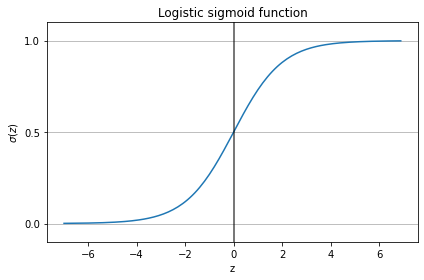

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(x=0.0, color='k', alpha=0.7)
plt.ylim(-0.1, 1.1)
plt.yticks([0.0, 0.5, 1.0])
plt.title('Logistic sigmoid function')
plt.xlabel('z')
plt.ylabel(r'$\sigma (z)$')
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

## Comparison with Adaline

In Adaline (Chapter: Introduction to neural networks and deep learning), we use the identity function, $\sigma(z)=z$, as the activation function. In logistic regression, this activation function simply becomes the sigmoid function. The output of the sigmoid function is then interpreted as the probability of a particular example belonging to class 1, $p(X) = \text{Pr}(Y=1 | X)$, given its features $X$, parameterized by the weights $\beta$.



The predicted probability for the *i*-th observation can be then converted into a binary outcome via a threshold function:

$$\hat{y}_i=\begin{cases} 1 & \text{if } p (x_i) \ge \text{threshold} \\ 0 & \text{otherwise} \end{cases}$$

Classification threshold shouldn't necessarily be 0.5, because thresholds are problem-dependent, then they must be tuned (see the notebook on Model Evaluation).

# Estimation of the parameters

With the logistic function, the odds become:

$$\frac{p(X)}{1-p(X)}=e^{\beta_0+\beta^T X}$$

By taking the natural logarithm of both sides we arrive at the **log-odds** or **logit**:

$$\text{logit}(p)=\ln{\left(\frac{p(X)}{1-p(X)}\right)}=\beta_0+\beta^T X$$

Note that the logistic regression model has a logit that is **linear in $X$**. Using this function will allow us to model the probabilities of the classes via linear functions in $X$, while at the same time ensuring that they sum up to one and remain in $[0,1]$.

Our goal is to estimate the parameters $\theta = \{\beta_0, ..., \beta_p\}$, and that can be done by **maximizing a likelihood** function (that is preferrable over *non linear least squares* because of its statistical properties). Assuming that all the observations are **independently Bernoulli distributed** (so we can write their joint probability density function as the product of the marginal distributions), the *likelihood function* can be defined in this way:

$$L(\theta; X)=\prod_{i:y_i=1}{p(x_i)}\prod_{j:y_j=0}{\left(1-p(x_j)\right)}=\prod_{i}{p(x_i)^{y_i}\left(1-p(x_i)\right)^{(1-y_i)}}$$

In practice, it is easier to maximize the natural logarithm of this equation (the maximum will change, but the maximum point won't change, since the logarithm is a strictly monotonically increasing function), which is called the **log-likelihood function:**

$$\begin{split}
l(\theta; X)=\ln{L(\theta; X)} &= \sum_{i=1}^{N}{\left[y_i\ln{p(x_i; \theta)} + (1-y_i)\ln{\left(1-p(x_i; \theta)\right)}\right]} \\
&= \sum_{i=1}^{N}{\left[y_i \theta^T x_i - \ln\left(1+e^{\theta^T x_i}\right)\right]}
\end{split}.$$

In the last equation we assumed that $x_i$ included the constant term $1$ to accomodate its intercept (since $\theta$ includes also $\beta_0$.

### Logistic cost function

If we prefer to think about minimization, we can alternatively consider the **logistic cost function**

$$
\begin{split}
J(\theta; X)=-\ln{L(\theta; X)} &=\sum_{i}{\left[-y_i\ln{p(x_i;\theta)} - (1-y_i)\ln{\left(1-p(x_i;\theta)\right)}\right]} \\
&= - \sum_{i=1}^{N}{\left[y_i \theta^T x_i - \ln\left(1+e^{\theta^T x_i}\right)\right]}
\end{split}.$$

and proceed to **minimize** it through gradiend descent, since it is a convex function.

Note that:
- For a training example $X$ whose true label is $Y=1$, the contribution to the cost function will be closer to zero if the hypothesis function outputs a value closer to 1 (i.e. a high value of probability for $X$ to have label 1), and it will increase to infinity if the hypothesis function outputs a value closer to 0 (i.e. it misclassify that training point and so it penalizes the learning algorithm by a very large cost).
- For a training example $X$ whose true label is $Y=0$, the contribution to the cost function will be closer to zero if the hypothesis function outputs a value closer to 0 (i.e. a low value of probability for $X$ to have label 1), and it will increase to infinity if the hypothesis function outputs a value closer to 1 (i.e. it misclassify that training point and so it penalizes the learning algorithm by a very large cost).

Let's visualize the cost of classifying a particular training sample for different values of the hypothesis $p(X)$

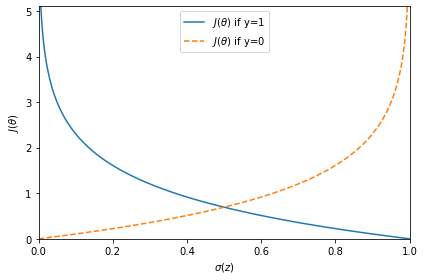

In [2]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(sigma_z, c1, label=r'$J(\theta)$ if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label=r'$J(\theta)$ if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0.0, 1.0])
plt.xlabel(r'$\sigma(z)$')
plt.ylabel(r'$J(\theta)$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Gradient ascent/descent

The simplest implementation of gradient descent is:
```
Repeat until termination condition {
```

$$\beta_j := \beta_j - \eta \frac{\partial}{\partial \beta_j}{J(\theta)}$$
    
```
}
```

Let's now do some mathematics and derive the gradient descent formula. First of all calculate the partial derivative of the logistic function (it will come in handy shortly):

$$\frac{\partial}{\partial z}{\sigma(z)} 
= \frac{\partial}{\partial z}{\frac{1}{1+e^{-z}}} 
= \frac{e^{-z}}{(1+e^{-z})^2} 
= \frac{1}{1+e^{-z}} \left( 1- \frac{1}{1+e^{-z}} \right) 
= \sigma(z)\left(1-\sigma(z)\right)$$

Now, consider the log-likelihood function, and calculate its partial derivative with respect to the $j$-th parameter $\beta_j$ (since the derivative of a summation is equal to the sum of the derivatives of its terms, we will first compute the derivative of a generic term, and then plug it into the summation):

$$ \begin{align}
\frac{\partial }{\partial \beta_j}{l(\boldsymbol{\theta})} 
&= \frac{\partial l}{\partial \sigma} \frac{\partial \sigma}{\partial z} \frac{\partial z}{\partial \beta_j} \\
&= \left( y \frac{1}{\sigma(z)} - (1-y) \frac{1}{1-\sigma(z)} \right) \frac{\partial}{\partial \beta_j}{\sigma(z)} \\
&= \left( y \frac{1}{\sigma(z)} - (1-y) \frac{1}{1-\sigma(z)} \right) \sigma(z)\left(1-\sigma(z)\right) \frac{\partial}{\partial \beta_j}{z} \\
&= \left( y\left(1-\sigma(z)\right) - (1-y)\sigma(z) \right) x_j \\
&= \left( y - \sigma(z) \right)x_j
\end{align}
$$

Therefore, to maximize the log-likelihood function, for each parameter, we perform the update in this way:

$$\beta_j := \beta_j + \eta \sum_{i=1}^{N}{\left( y^{(i)} - \sigma(z^{(i)}) \right)x_j}$$

with $\eta \in \mathbb{R}_+$ small enough (it is a parameter determining the size of the step in the direction of maximum ascent), and $N$ being the number of available measurements.

Since maximizing the log-likelihood function is equal to minimize the cost function definied earlier, we can return to the minimization problem and descent the gradient updating the parameters in this way:

$$\beta_j := \beta_j - \eta \sum_{i=1}^{N}{\left( y^{(i)} - \sigma(z^{(i)}) \right)x_j}$$

In a more compact form:

$$\boldsymbol{\beta} := \boldsymbol{\beta} + \Delta \boldsymbol{\theta}$$

where $\Delta \boldsymbol{\theta} = -\eta \nabla J(\boldsymbol{\theta})$

### Variants

In practice, [variants of the gradient descent algorithm](https://ruder.io/optimizing-gradient-descent/) are typically used, such as:
- Conjugate gradient (1952)
- Biconjugate gradient stabilized (BICGSTAB) (1992)
- BFGS
- L-BFGS (1995)
- Adam (2015)
- ...

In [3]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier with gradient descent from the book "Python Machine Learning"
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training set
    random_state : int
        Random number generator seed for random weight
        initialization.
    
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting
    cost_ : list
        Logistic cost function value in each epoch
        
    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # compute the logistic `cost`
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """Compute logistic sigmoid activation function"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

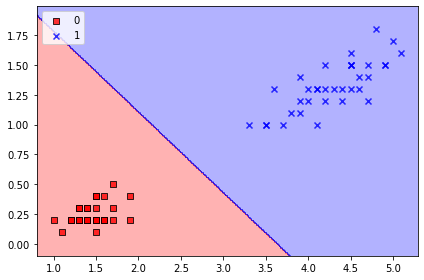

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from utils import plot_decision_regions

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X_train_01_subset, y_train_01_subset, classifier=lrgd, resolution=0.01)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Multiple Logistic Regression

When the target variable $Y$, instead of being binary, can take up to $K$ values, we talk about multiple logistic regression. In that case, the model is specified by $K-1$ log-odds, where we compare the probability of $Y$ being equal to a particular value, with respect to a reference value, for instance, the $K$-th one (but we could have chosen any of the $K$ labels):

$$\begin{split}
\log \frac{\mathrm{Pr}(Y=1 | X=x)}{\mathrm{Pr}(Y=K | X=x)} &= \beta_{10} + \beta_1^T x \\
\vdots \\
\log \frac{\mathrm{Pr}(Y=K-1 | X=x)}{\mathrm{Pr}(Y=K | X=x)} &= \beta_{(K-1)0} + \beta_{K-1}^T x 
\end{split}$$

where

$$\begin{split}\mathrm{Pr}(Y=k | X=x) &= \frac{\exp(\beta_{k0} + \beta_k^Tx)}{1 + \sum_{l=1}^{K-1}{\exp(\beta_{l0} + \beta_l^Tx)}}, \; 1,...,K-1 \\
\mathrm{Pr}(Y=K | X=x) &= \frac{1}{1 + \sum_{l=1}^{K-1}{\exp(\beta_{l0} + \beta_l^Tx)}}.
\end{split}$$ 

Note that the $K$ probabilities sum up to one.

The maximization of the likelihood function in the multiclass case ($K\ge 3$) can be done through the Newton-Raphson algorithm (see Section 4.4.1 of "The Elements of Statistical Learning - Friedman, Tibshirani, Hastie").

## Example

```
⚠️ Work in progress, the example has not been completed yet ⚠️

✍🏻 TO-DO: show the confounding effect --> prediction using only the student status tells a different story than when using also the other regressors.
```

Consider the `Default` dataset, in which we are interested in predicting whether an individual will default on his or her credit card payment, on the basis of annual income (`income`) and monthly credit card balance (`balance`).

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/Default.csv', index_col=0)
# change columns order
data = data[['balance', 'income', 'student', 'default']]

print('Default dataset has {n_entries} entries'.format(n_entries=data.shape[0]))
(count_def_no, count_def_yes) = data['default'].value_counts()
print('The number of Default == \'Yes\' is {}'.format(count_def_yes))
print('The number of Default == \'No\' is {}'.format(count_def_no))
data.head()

Default dataset has 10000 entries
The number of Default == 'Yes' is 333
The number of Default == 'No' is 9667


,balance,income,student,default
1,729.526495,44361.625074,No,No
2,817.180407,12106.134700,Yes,No
3,1073.549164,31767.138947,No,No
4,529.250605,35704.493935,No,No
5,785.655883,38463.495879,No,No


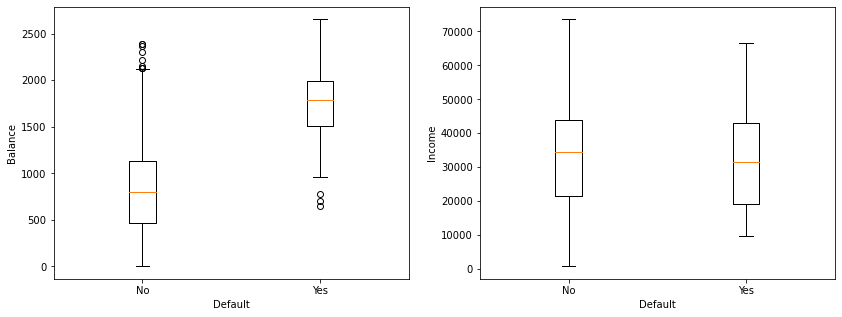

In [110]:
y = data.pop('default')

# convert student "Yes"/"No" to 1/0
data.student.replace(('Yes','No'), (1,0), inplace=True)



balance = [data.loc[y == 'No', 'balance'], data.loc[y == 'Yes', 'balance']]
income = [data.loc[y == 'No', 'income'], data.loc[y == 'Yes', 'income']]

# Visualize Box Plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
ax1.boxplot(balance, labels=['No', 'Yes'])
ax1.set_xlabel('Default')
ax1.set_ylabel('Balance')
ax2.boxplot(income, labels=['No', 'Yes'])
ax2.set_xlabel('Default')
ax2.set_ylabel('Income')
plt.show()

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

print('Training set has {} entries'.format(X_train.shape[0]))
(count_train_no, count_train_yes) = y_train.value_counts()
print('The number of Default == \'Yes\' in the train set is {}'.format(count_train_yes))
print('The number of Default == \'No\' in the train set is {}'.format(count_train_no))

Training set has 6700 entries
The number of Default == 'Yes' in the train set is 223
The number of Default == 'No' in the train set is 6477


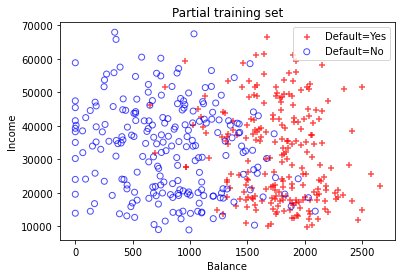

In [112]:
# Visualize data
plt.scatter(X_train.loc[y_train == 'Yes', 'balance'], X_train.loc[y_train == 'Yes', 'income'], 
            marker='+', color='r', alpha=0.7, label='Default=Yes')

# plot just a subset of points with default=='No' (because the dataset was not balanced)
plt.scatter(X_train.loc[y_train == 'No', 'balance'].iloc[:count_train_yes], X_train.loc[y_train == 'No', 'income'].iloc[:count_train_yes],
            marker='o', facecolors='none', color='b', alpha=0.7, label='Default=No')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.title('Partial training set')
plt.legend()
plt.show()

We have analyzed just the correlation between the features `balance` and `income` and the output `default`. Anyway, in our dataset we can find another feature called `student`, which is a boolean binary variable that indicates if that specific individual is a student or not.

Now, let's **train a logistic regression model** to predict the probability of `default` according to the `student` status. We'll use dummy variables to code the student status.

In [113]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs')
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[ 4.77967977e-04 -1.29901960e-04 -2.30604529e-06]]
[-1.7920408e-06]
